In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import os
import sys
sys.path.append("..")

from pathlib import Path


In [ ]:
from google.colab import drive
drive.mount('/content/drive')# You must grant COLAB access to your Google Drive

Mounted at /content/drive


In [ ]:
DATA_ROOT = Path("/content/drive/MyDrive/Colab Notebooks/RainForestAudio/data")
AUDIO_ROOT = Path(DATA_ROOT/"train/")
TRAIN_AUDIO_ROOT = Path(DATA_ROOT/"samples_long")
TEST_AUDIO_ROOT = Path(DATA_ROOT/"test")
VAL_AUDIO_ROOT = Path(DATA_ROOT/"val")
df_train = pd.DataFrame([path.stem for path in Path(TRAIN_AUDIO_ROOT).glob("*.flac")], columns=["fname"])
df_test = pd.DataFrame([path.stem for path in Path(TEST_AUDIO_ROOT).glob("*.flac")], columns=["recording_id"])
df = pd.read_csv(Path(DATA_ROOT/"train_tp.csv"))
print(df_train.shape, df_test.shape)
df

(3648, 1) (0, 1)


,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
0,003bec244,14,1,44.5440,2531.250,45.1307,5531.25
1,006ab765f,23,1,39.9615,7235.160,46.0452,11283.40
2,007f87ba2,12,1,39.1360,562.500,42.2720,3281.25
3,0099c367b,17,4,51.4206,1464.260,55.1996,4565.04
4,009b760e6,10,1,50.0854,947.461,52.5293,10852.70
...,...,...,...,...,...,...,...
1211,fe8d9ac40,13,1,53.4720,93.750,54.0960,843.75
1212,fea6b438a,4,1,43.5787,2531.250,45.7653,4031.25
1213,ff2eb9ce5,0,1,15.2267,5906.250,16.0213,8250.00
1214,ffb8d8391,5,1,14.3467,4781.250,16.6987,10406.20


In [ ]:
df_train["recording_id"] = df_train["fname"].apply(lambda x: x.split("_")[0])
df_train["species_id"] = df_train["fname"].apply(lambda x: x.split("_")[1])
df_train["species_id"] = df_train["species_id"].astype(int)
df_train

,fname,recording_id,species_id
0,b9a6e6ce4_5_882_3,b9a6e6ce4,5
1,b9f3581d5_18_883_1,b9f3581d5,18
2,b9f3581d5_18_883_2,b9f3581d5,18
3,b9f3581d5_18_883_3,b9f3581d5,18
4,bac502597_0_884_1,bac502597,0
...,...,...,...
3643,2c97a8020_17_214_2,2c97a8020,17
3644,2c97a8020_17_214_3,2c97a8020,17
3645,2cd094d21_12_215_1,2cd094d21,12
3646,2cd094d21_12_215_2,2cd094d21,12


In [ ]:
df["dur"] = df["t_max"] - df["t_min"]
df["dia"] = df["f_max"] - df["f_min"]
df.columns

Index(['recording_id', 'species_id', 'songtype_id', 't_min', 'f_min', 't_max',
       'f_max', 'dur', 'dia'],
      dtype='object')

In [ ]:
df["species_id"].dtype, df_train["species_id"].dtype

(dtype('int64'), dtype('int64'))

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,  random_state=124)

df_train["fold"] = np.zeros(df_train.shape[0]).astype(int)
for n, tindex in enumerate(skf.split(df[['f_min', 'f_max', 'dur', 'dia']], df["species_id"])):
  train_index, test_index = tindex
  for i in test_index:
    row_index = df_train[df_train["recording_id"] == df.loc[i, "recording_id"]][df_train["species_id"] == df.loc[i, "species_id"]].index

    df_train.loc[row_index, "fold"] = int(n) 
    #print(df_train[df_train["recording_id"] == df.loc[i, "recording_id"]][df_train["species_id"] == df.loc[i, "species_id"]], df.loc[i, "species_id"])
df_train

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/lo

,fname,recording_id,species_id,fold
0,b9a6e6ce4_5_882_3,b9a6e6ce4,5,2
1,b9f3581d5_18_883_1,b9f3581d5,18,3
2,b9f3581d5_18_883_2,b9f3581d5,18,3
3,b9f3581d5_18_883_3,b9f3581d5,18,3
4,bac502597_0_884_1,bac502597,0,3
...,...,...,...,...
3643,2c97a8020_17_214_2,2c97a8020,17,0
3644,2c97a8020_17_214_3,2c97a8020,17,0
3645,2cd094d21_12_215_1,2cd094d21,12,1
3646,2cd094d21_12_215_2,2cd094d21,12,1


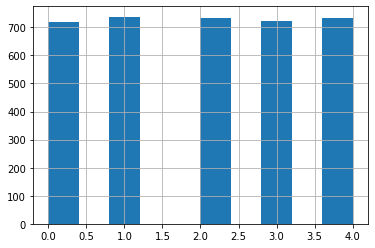

In [ ]:
df_train["fold"].hist()

In [ ]:
res = []
for n, row in df_train.groupby(by="fold"):
  res.append(row.index.to_numpy())
np.save("folds.npy", np.array(res, dtype=object), allow_pickle=True)

In [ ]:
res[0].shape

(720,)

In [ ]:
!cp folds.npy drive/MyDrive/Colab\ Notebooks/RainForestAudio/data